# Полиномиальная регрессия. Создание модели предсказания уровня продаж при вложении в разную рекламу. Определние влияния рекламы на продажи. 

Смоделируем нелинейные зависимости между переменными.

Полином - это суммы степеней переменной, умноженные на коэффициенты

Полином второй степени - у = a + bx + cx^2, где a, b, c это коэффициенты

Нелинейная зависимость - изменение одной переменной не приводит к пропорциональному изменению другой переменной.

# 1. создание признаков

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'Regression\Data\Advertising.csv')

In [22]:
df.head(3)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


Отделим признаки и целевую переменную

In [23]:
X = df.drop('sales', axis=1)

In [24]:
y = df['sales']

Загрузим библиотеку для полиномиальной регрессии

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
polinomial_converter = PolynomialFeatures(degree=2, include_bias=False)
# degree - до какой максимальной степени создавать полином. т.е. сами признаки + квадраты (кубы и т.д.) этих признаков
# interaction_term - добавить произведения признаков (ТВ*радио, ТВ*газету и тд). Иногда нужно создать такие слагаемые без степеней высоких порядков
# include_bias - bias = постоянная константа. Значение целевой переменной, когда все признаки равны нулю. Смещение относительно нуля для целевой переменной

Здесь метод fit не обучает модели, а анализирует признаки

In [27]:
polinomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

Создадим пониномиальные признаки

In [28]:
poly_features = polinomial_converter.transform(X)

Вместо двух команд fit и transform есть одна команда:

polinomial_converter.fit_transform(X)

In [29]:
polinomial_converter.transform(X).shape

(200, 9)

200 строк и 9 колонок. 

In [30]:
X.shape

(200, 3)

200 строк и 3 колонки. Почему так? Из 3 колонок мы получили 9

In [31]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [32]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

Исходные признаки

2.301000e+02 == 230.1 и далее признаки радио и газеты (сместилась точка на 2 и запись получилась умноженной на 10 в стпени 2)

слагаемые interaction_term

8.697780e+03 == 230.1 * 37.8

2.615760e+03 == 37.8 * 69.2

1.592292e+04 == 230.1 * 69.2

Другие 3 слагаемые = это квадраты исходных признаков deegre = 2 

230.1 ** 2 == 5.294601e+04

# 2. обучение и оценка модели

При сохранении обученной модели нам потребуется сохранить также и polinomial_converter, так как наша модель будет ожидать на вход 9 признаков, а не 3.

Разобьем данные на обучающие и тестовые наборы

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=101)

In [37]:
from sklearn.linear_model import LinearRegression

Создадим модель регрессии

In [38]:
model = LinearRegression()

Обучим модель

In [39]:
model.fit(X_train, y_train)

LinearRegression()

Проверим работу модели

In [40]:
test_predictions = model.predict(X_test)

посмотрим на коэффициенты бетта из формулы

In [41]:
model.coef_

array([ 5.28857442e-02,  1.66632005e-02,  1.44706371e-02, -1.12669173e-04,
        1.13270614e-03, -6.02100349e-05,  8.80211097e-05,  7.41831493e-05,
       -3.05994134e-05])

Определим метрики

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
# средняя абсолютная ошибка
MAE = mean_absolute_error(y_test, test_predictions)

In [44]:
# средняя квадратичная ошибка
MSE = mean_squared_error(y_test, test_predictions)

In [45]:
# корень из средней квадратичной ошибки
RMSE = np.sqrt(MSE)

Главные метрики для нас MAE и RMSE. Они измеряются в тех-же еденицах измерения, что и целевая переменная

In [46]:
MAE

np.float64(0.4431065831480148)

In [47]:
RMSE

np.float64(0.5809450952903324)

Полиномиальная регрессия работает заметно лучше линейной решрессии. Там ошибка равнялась 10 - 15 %, а здесь - 0,4 - 0,5 %

Сравним признаки и коэффициенты

In [48]:
model.coef_

array([ 5.28857442e-02,  1.66632005e-02,  1.44706371e-02, -1.12669173e-04,
        1.13270614e-03, -6.02100349e-05,  8.80211097e-05,  7.41831493e-05,
       -3.05994134e-05])

In [49]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [50]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

# выбираем гиперпараметры модели

Дилемма смещения-дисперсии (Bias-Variance Trade-Off). Недообучение и переобучение.

Выбираем степень полинома - оптимальную сложность модели

Напишем цикл по различным степеням полинома и внутри цикла для каждой конкретной степени выполним наши обычные шаги = обучим модель, посчитаем ошибки и выведем наши результаты на график.

Шаги:

1. Создадим различные степени полинома;
2. Разобьем данные на тестовые и обучающие наборы;
3. Создать новую модель и обучить её;
4. Вычислить и сохранить метрику RMSE для обучающего и для тестового набора данных;
5. Нарисовать график с результатами - ошибки по степеням полинома.

In [58]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):  # степени полинома от 1 до 10

    polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [59]:
# посмотрим на ошибки обучающих данных и увидим, что ошибки падают
train_rmse_errors

[np.float64(1.734594124329376),
 np.float64(0.5879574085292234),
 np.float64(0.43393443569020657),
 np.float64(0.35170836883993556),
 np.float64(0.2509342923789987),
 np.float64(0.19433503220621345),
 np.float64(5.421511117920239),
 np.float64(0.14165557240058033),
 np.float64(0.17228655871465168)]

Мы видим всплески и они означают, что в этих точках слишком высокая степень полинома.

In [60]:
# посмотрим на ошибки тестовых данных и увидим, что ошибки растут
test_rmse_errors

[np.float64(1.5161519375993877),
 np.float64(0.6646431757269),
 np.float64(0.5803286825219469),
 np.float64(0.5077742640851456),
 np.float64(2.575819388953378),
 np.float64(4.326108924477438),
 np.float64(1379.5706760334367),
 np.float64(4506.560003895944),
 np.float64(97547.21710738621)]

Мы видим взрывной всплеск ошибок и это означает, что в некоторой точке идет переобучение

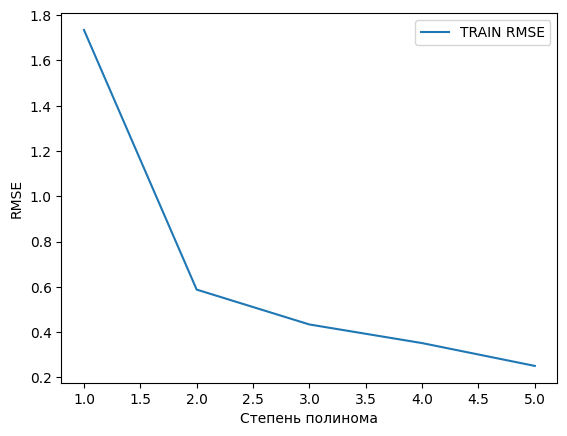

In [61]:
# Нанесем первые 5 точек  тренировочного набора на график
plt.plot(range(1, 6), train_rmse_errors[:5], label='TRAIN RMSE')
plt.xlabel('Степень полинома')
plt.ylabel('RMSE')
plt.legend()

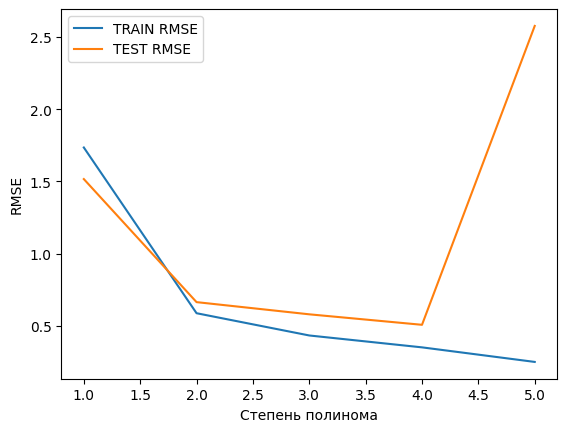

In [62]:
# Домавим метрику для тестового набора к тренировочному
plt.plot(range(1, 6), train_rmse_errors[:5], label='TRAIN RMSE')
plt.plot(range(1, 6), test_rmse_errors[:5], label='TEST RMSE')

plt.xlabel('Степень полинома')
plt.ylabel('RMSE')
plt.legend()

Начиная с 4 степени полинома начинает резко расти. Это означает, что модель переобучена

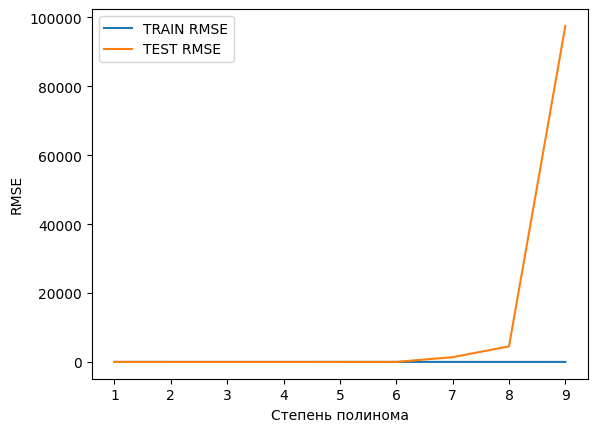

In [63]:
# Построим график до 10 степени
plt.plot(range(1, 10), train_rmse_errors, label='TRAIN RMSE')
plt.plot(range(1, 10), test_rmse_errors, label='TEST RMSE')

plt.xlabel('Степень полинома')
plt.ylabel('RMSE')
plt.legend()

какую степень полинома нам выбрать? На графиках мы видим, что модель имеет наименьшую ошибку как на обучающем так и на тестовом наборе в степени 4. Но логичнее выбрать либо 2 либо 3 степерь полинома.

# внедрение модели

In [64]:
# сщздадим финальный поликонвертер
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [65]:
# сщздадим финальную модель
final_poly_model = LinearRegression()

In [66]:
# сконвертируем признаки и обучим модель
full_converted_X = final_poly_converter.fit_transform(X)
final_poly_model.fit(full_converted_X, y)

LinearRegression()

In [67]:
from joblib import dump, load

In [ ]:
# сохраним модель
dump(final_poly_model, r'Regression\safe models\final_poly_model.joblib')

In [ ]:
dump(final_poly_converter, r'Regression\safe models\final_poly_converter.joblib')

['C:\\Users\\mmd28\\OneDrive\\Рабочий стол\\Academic potfolio\\Classical Machine Learning\\Supervised learning\\Regression\\safe models\\final_poly_converter.joblib']

Загрузим и применим модель

In [ ]:
loaded_converter = load(r'Regression\safe models\final_poly_converter.joblib')
loaded_model = load(r'Regression\safe models\final_poly_model.joblib')

Внедрение модели для новой рекламной акции

In [72]:
campaign = [[149, 22, 12]]  # 149 денег на ТВ, 22 денег на радио и 12 денег на газету

In [73]:
loaded_converter.fit_transform(campaign)

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [74]:
loaded_converter.fit_transform(campaign).shape

(1, 19)

In [75]:
transformed_data = loaded_converter.fit_transform(campaign)

In [76]:
loaded_model.predict(transformed_data)

array([14.64501014])

При вложении 149 денег на ТВ, 22 денег на радио и 12 денег на газету мы увеличим продажи на 14,65 едениц товара